In [61]:
import os
import sys
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

sys.path.append(os.path.abspath(".."))

In [62]:
with open("../models/tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)


In [63]:
df = pd.read_csv("../data/processed/resumes_cleaned.csv")

X_text = df["clean_text"]
y = df["category"]


In [64]:
X = vectorizer.transform(X_text)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [66]:
with open("../models/SVM.pkl", "rb") as f:
    svm_model = pickle.load(f)

y_pred = svm_model.predict(X_test)


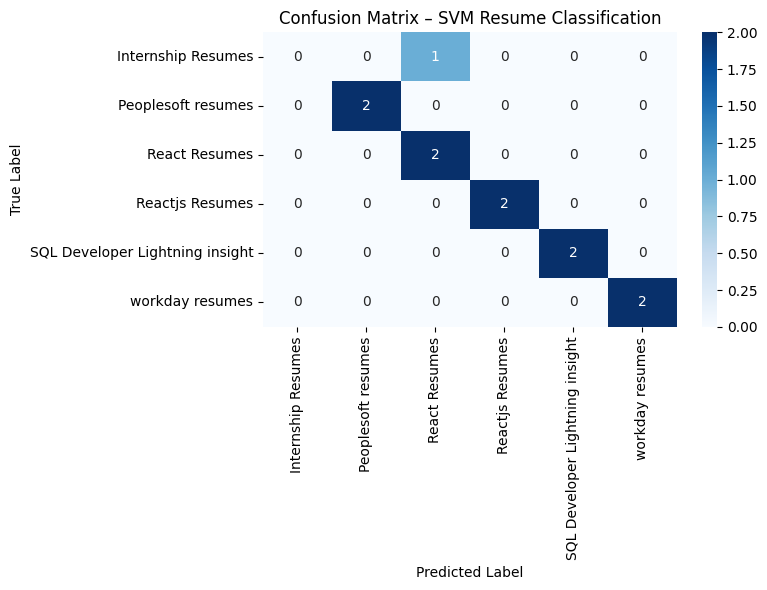

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – SVM Resume Classification")

plt.tight_layout()
plt.savefig("../visuals/confusion_matrix_svm.png")
plt.show()


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

             Internship Resumes       0.00      0.00      0.00         1
             Peoplesoft resumes       1.00      1.00      1.00         2
                  React Resumes       0.67      1.00      0.80         2
                Reactjs Resumes       1.00      1.00      1.00         2
SQL Developer Lightning insight       1.00      1.00      1.00         2
                workday resumes       1.00      1.00      1.00         2

                       accuracy                           0.91        11
                      macro avg       0.78      0.83      0.80        11
                   weighted avg       0.85      0.91      0.87        11



c:\Users\Dhanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dhanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dhanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

Although Logistic Regression and Naive Bayes achieved similar accuracy, SVM was selected because it handles high-dimensional sparse TF-IDF features more effectively by maximizing the decision margin, leading to better generalization and robustness for unseen resumes.

SVM was chosen as the final model due to its robustness on sparse text features and superior generalization characteristics, despite similar accuracy to other linear models.
